## Imports

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os
import pandas as pd
import seaborn as sns

## Load Data

In [28]:
DATA_FOLDER_PATH = os.path.normpath(os.path.join(os.getcwd(), "..", "data"))
mental_health_lifestyle_raw_df = pd.read_csv(os.path.join(DATA_FOLDER_PATH, "mental_health_dataset.csv"))

In [29]:
mental_health_lifestyle_raw_df.head(5)

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,Non-binary,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,Yes,NaN,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,No,Low,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5


## Process Data

In [30]:
mental_health_lifestyle_df = mental_health_lifestyle_raw_df[[
    "Age",
    "Sleep_Hours",
    "Work_Hours",
    "Physical_Activity_Hours",    
    "Mental_Health_Condition"
]]

In [31]:
mental_health_lifestyle_df.head(5)

,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Mental_Health_Condition
0,36,7.1,46,5,No
1,34,7.5,47,8,Yes
2,65,8.4,58,10,Yes
3,34,9.8,30,2,No
4,22,4.9,62,5,Yes


### Remove NaNs

In [32]:
mental_health_lifestyle_df[mental_health_lifestyle_df.isna().any(axis=1)]

,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Mental_Health_Condition


### Map Ages to Age Groups

In [33]:
def get_age_group(age):
    if age < 18:
        return "17 years and below"
    if age <= 29:
        return "18 - 29 years"
    if age <= 39:
        return "30 - 39 years"
    if age <= 49:
        return "40 - 49 years"
    if age <= 59:
        return "50 - 59 years"
    if age <= 69:
        return "60 - 69 years"
    if age <= 79:
        return "70 - 79 years"
    return "80 years and above"

mental_health_lifestyle_df["age_group"] = mental_health_lifestyle_df["Age"].apply(get_age_group)

In [34]:
mental_health_lifestyle_df.head(5)

,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Mental_Health_Condition,age_group
0,36,7.1,46,5,No,30 - 39 years
1,34,7.5,47,8,Yes,30 - 39 years
2,65,8.4,58,10,Yes,60 - 69 years
3,34,9.8,30,2,No,30 - 39 years
4,22,4.9,62,5,Yes,18 - 29 years


### Handle Columns

In [35]:
# drop columns
mental_health_lifestyle_df = mental_health_lifestyle_df.drop(columns="Age")

# reorder columns
mental_health_lifestyle_df = mental_health_lifestyle_df[[
    "age_group",
    "Sleep_Hours",
    "Work_Hours",
    "Physical_Activity_Hours",
    "Mental_Health_Condition"
]]

# rename columns
mental_health_lifestyle_df.columns = [
    "age",
    "sleep_hours",
    "work_hours",
    "physical_hours",
    "has_mental_health_condition"
]

In [36]:
mental_health_lifestyle_df.head(5)

,age,sleep_hours,work_hours,physical_hours,has_mental_health_condition
0,30 - 39 years,7.1,46,5,No
1,30 - 39 years,7.5,47,8,Yes
2,60 - 69 years,8.4,58,10,Yes
3,30 - 39 years,9.8,30,2,No
4,18 - 29 years,4.9,62,5,Yes


### Handle Rows

In [37]:
# choose target age groups
mental_health_lifestyle_df = mental_health_lifestyle_df[
    (mental_health_lifestyle_df["age"].isin(["18 - 29 years", "60 - 69 years"]))
]

# arrange rows in ascending order of age group
mental_health_lifestyle_df = mental_health_lifestyle_df.sort_values(by="age", ascending=True)

In [38]:
mental_health_lifestyle_df.head(5)

,age,sleep_hours,work_hours,physical_hours,has_mental_health_condition
988,18 - 29 years,8.4,44,3,No
462,18 - 29 years,5.4,43,2,No
813,18 - 29 years,8.3,40,1,Yes
811,18 - 29 years,5.9,64,0,Yes
478,18 - 29 years,4.6,47,0,No


## Plot Violin Graph

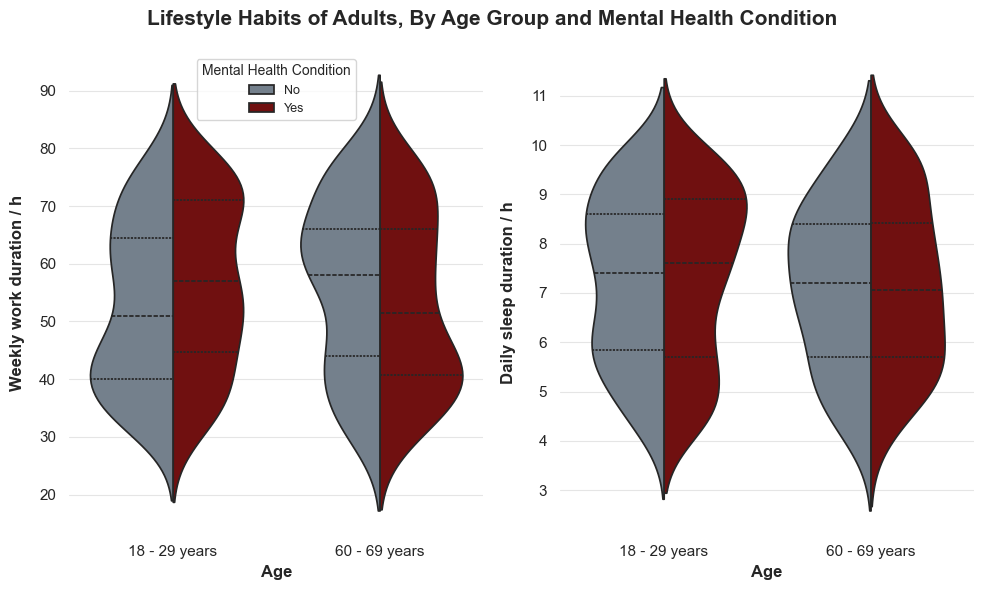

In [40]:
# set graph theme (similar to theme_minimal() in ggplot2) and colour palette
sns.set_theme(
    style="whitegrid",
    palette=["slategrey", "maroon"],
    rc={
        "axes.facecolor": "white",
        "figure.facecolor": "white",
        "axes.edgecolor": "white",
        "grid.color": "#e5e5e5",
        "grid.linewidth": 0.8,
        "axes.spines.left": False,
        "axes.spines.bottom": False,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
)

# add 2 violin plots
fig, axs = plt.subplots(figsize=(10, 6), ncols=2)

sns.violinplot(
    data=mental_health_lifestyle_df,
    x="age",
    y="work_hours",
    hue="has_mental_health_condition",
    split=True,
    inner="quart",
    ax=axs[0],
)

# Add legend
axs[0].legend_.remove()
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(
    title="Mental Health Condition",
    handles=handles,
    labels=labels,
    fontsize=9,
    title_fontsize=10,
    loc="upper center"
)

sns.violinplot(
    data=mental_health_lifestyle_df,
    x="age",
    y="sleep_hours",
    hue="has_mental_health_condition",
    split=True,
    inner="quart",
    legend=False,
    ax=axs[1]
)

# Adjust second plot's intervals
axs[1].yaxis.set_major_locator(mticker.MultipleLocator(1))

# name axes
axs[0].set_xlabel("Age", fontweight="bold", fontsize=12)
axs[0].set_ylabel("Weekly work duration / h", fontweight="bold", labelpad=10)
axs[1].set_xlabel("Age", fontweight="bold", fontsize=12)
axs[1].set_ylabel("Daily sleep duration / h", fontweight="bold", labelpad=10)

fig.suptitle("Lifestyle Habits of Adults, By Age Group and Mental Health Condition", fontweight="bold", fontsize=15)
plt.tight_layout()
plt.show()